# Introduction

Harmonic oscillators are the pulsing hearts of seismic sensors; they beat with the ground as it moves up and down. While the first mechanical seismic sensors at the turn of the last century were simple harmonic oscillators in the form of a mass-spring system or pendulum, this simple form of oscillators soon evolved into a magnetic mass and coil of wire to use the electromagnetic induction effect, and create a voltage corresponding to the beating of the ground. 

Today, majority of the ultra-sensitive electronic feedback broadband sensors incorporate a capacitive displacement transducer and a force transducer to increase sensitivity and resolution of the motion detection threshold. Despite the electronic additions and components, the heart of these modern equipment still beat with an oscillating mass and equivalent electronic damper. 

That is why it is essential to review physics of simple harmonic oscillators, and damped harmonic oscillators, in its raw form and take to the heart the relationship between mass, spring stiffness, length of the spring and how they affect frequency of oscillation.

In the exercises below, we review these basic cases. 




# simple mass-spring system:




<div class="caption">An example of a mass-on-a-spring from <a href="http://hyperphysics.phy-astr.gsu.edu/hbase/shm2.html">HyperPhysics</a></div></div>


<div class="figure"><img src="http://hyperphysics.phy-astr.gsu.edu/hbase/imgmec/shm8.gif" style="width:190px">



Everything begins with the Newton's Second Law:


$$F = ma, $$

For the mass to be in equilibrium position, forces on the mass from gravity and from the spring should be equal. Assuming displacement is a cosine function, we can write equations and solve for angular frequency $\omega$ as follow: 
    
$$F = ma, $$

$$Fx = -Kx, $$  
    
$$ ma = -Kx, $$ 
    
$$m \frac{d^2 x}{dt^2} = -Kx,$$

$$ \frac{d^2 x}{dt^2} = -\frac{K}{m}x,$$
 
    
$$ x(t) = A cos(\omega t +\phi) $$    

$$ -A\omega^2 cos (\omega t +\phi) = -\frac{K}{m}  A cos(\omega t +\phi) $$   
    
$$ \omega = \sqrt{\frac {k}{m}}$$    
    
 
Natural frequency of oscillation in the simple mass-spring only depends on the stiffness of the spring and the mass.
 
In the absence of damping, this oscillator oscillates with equal displacement on either sides of the equilibrium position and forever!     
        

## Main

## import statements

In [8]:
import numpy as np           # math stuff
from obspy import read
import math

import matplotlib as mpl
import matplotlib.pyplot as plt

import warnings              # depress useless FutureWarning
# suppress all of obspy's stupid future deprecation warnings
warnings.simplefilter('ignore', FutureWarning)

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt

## 1- Mass-Spring -- Frequency.SpringStiffness.Mass relationship

[ 1.          1.44444444  1.88888889  2.33333333  2.77777778  3.22222222
  3.66666667  4.11111111  4.55555556  5.        ]


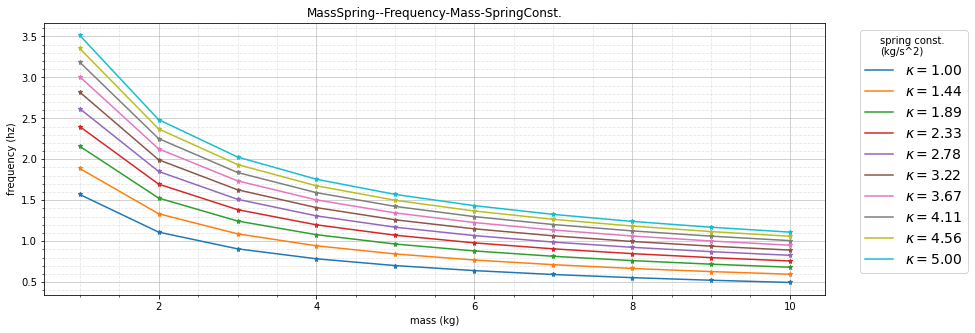

In [46]:
# simple harmonic oscillator
# 1- Build a mass-spring system 
#
# equation:
# MASS-SPRING ::: 2*pi*F = sqrt (K/M)
# plot F,k,M (Frequency, Spring constant, Mass)
#
# Units: 
# K (spring constant) = Newton/meter or (kg/s^2) 
# M (Mass) = kg
# F (Frequency) = 1/s
#
# Objectives:
# observe relationships of these parameters, how do they change with respect to eachother?
# 
#
#
N = 10
# assign Mass (kg) 
pm = np.linspace(1,10,N)
# assign spring constant (kg/s^2) 
kss = np.linspace(1,5,N)


fig = plt.figure(figsize=(14,5))
ax1 = fig.add_subplot(111, label="1")

colors = np.array([
    [232,  85,  18],
    [244, 169,   0],
    [243, 235,   6],
    [181, 211,  50],
    [138, 202, 148],
    [124, 205, 222],
    [ 85, 163, 220],
    [ 68,  98, 175],
    [ 61,  83, 166],
    [ 35,  31,  32]])/255
colors = colors[::-1]  # flip the array around



for k in kss:

    px = k/pm
    pf = (np.sqrt(px))/2*np.pi
    ax1.plot(pm, pf, marker = '*', markersize=5 ) 


## plot labels
ax1.set_xlabel('mass (kg)', color="k") 
ax1.set_ylabel('frequency (hz)', color="k")
ax1.set_title('MassSpring--Frequency-Mass-SpringConst.')

plt.gca().xaxis.set_minor_locator(mpl.ticker.AutoMinorLocator())
plt.gca().yaxis.set_minor_locator(mpl.ticker.AutoMinorLocator())
plt.grid(which='major', alpha=.7)
plt.grid(which='minor', linestyle='--', alpha=.3)

for h, c in zip(kss, colors):
    ax1.plot(np.nan, np.nan, '-', label=r"$ \kappa = {:.2f}$".format(h))
#    ax1.plot(pm, pf, '-', label=r"$ \kappa = {:.2f}$".format(h))
    plt.legend(bbox_to_anchor=(1.035,1), loc="upper left", fontsize=14
               , title='spring const. \n(kg/s^2)')

print (kss)
plt.show()

## Damped Mass-Spring


Simple Harmonic Motion is a rarity in the real world! There is always some kind of a frictional force that acts on the motion which dampen and eventually kills it. Like a Swing that stops swinging in the absence of an external force(push).
 
Seismologist incorporate, adjust and calculate for the effect of damping on the oscillator within the seismic sensor and use it to their benefit. As the ground shake continuously by the arrival of seismic waves, the oscillator in the sensor also moves. But this oscillation needs to be under control, and the oscillator should come to a resting equilibrium quickly after each shaking.  

Let’s take a look and review the mass-spring system with the effect of damping.
We can write the Newton’s second law:

$$ ma = -bv-Kx $$

$$m \frac{d^2 x}{dt^2} +b\frac{dx}{dt} +Kx = 0,$$

And solving:

$$ \omega = \sqrt{\frac {k}{m} - (\frac {b}{2m}^2}) $$ 

$\omega_0$ is the antural frequency of the system in the absense of damping 

$$ \omega_0 = \sqrt {\frac{K}{m}},$$



$$ \omega = \sqrt{\omega_0^2 - (\frac {b}{2m}^2}) $$

## 2- Damped Mass-Spring -- FKMb relationship


[ 0.63661977  0.31830989  0.21220659  0.15915494  0.12732395  0.1061033
  0.09094568  0.07957747  0.07073553  0.06366198]
[ 0.63658907  0.31806418  0.21137603  0.15717779  0.12342666  0.09925054
  0.0797227   0.06189359  0.0428629   0.01199379]
[ 0.63649696  0.31732593  0.20886455  0.15109116  0.11091615  0.07502636
  0.02468774         nan         nan         nan]
[ 0.6363434   0.31609167  0.20461024  0.14036147  0.08611706         nan
         nan         nan         nan         nan]
[ 0.63612836  0.31435557  0.19850109  0.12378718  0.02398759         nan
         nan         nan         nan         nan]
[ 0.63585178  0.31210926  0.1903586   0.09845969         nan         nan
         nan         nan         nan         nan]
[ 0.63551357  0.30934161  0.17990689  0.05305165         nan         nan
         nan         nan         nan         nan]
[ 0.63511363  0.30603848  0.16671222         nan         nan         nan
         nan         nan         nan         nan]
[ 0.63465185  0.3

/Users/akram/miniconda3/envs/science/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in sqrt
/Users/akram/miniconda3/envs/science/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in sqrt
/Users/akram/miniconda3/envs/science/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in sqrt
/Users/akram/miniconda3/envs/science/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in sqrt
/Users/akram/miniconda3/envs/science/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in sqrt
/Users/akram/miniconda3/envs/science/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in sqrt
/Users/akram/miniconda3/envs/science/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in sqrt
/Users/akram/

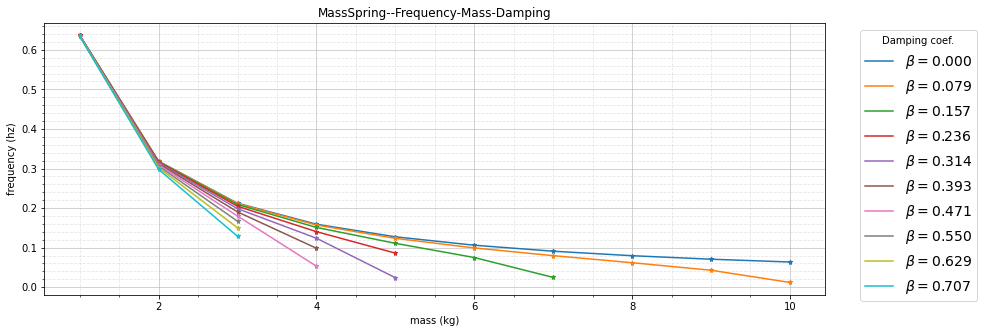

In [53]:
# 2- Build a damped mass-spring
# equations:
# DAPMED MASS-SPRING ::: 2*pi*F = sqrt ((K/M)**2 - (b/2*M)**2)
# plot F,K,M,b - 3D surface plot
# observe relationships of these parameters, and how they change with respect to eachother

N = 10
#MASS
pm = np.linspace(1,10,N)
# spring constant(kg/s^2)
k = 4

# make a N damping coefficients from 0 to sqrt(2)/2 (critical damping) 0.707
bss = np.linspace(0, np.sqrt(2)/2, N)
#damping_coefs = np.linspace(0, np.sqrt(2)/2, N)

fig = plt.figure(figsize=(14,5))
ax1 = fig.add_subplot(111, label="1")

for b in bss:
    pw0 = (k/pm)**2
    pf = (np.sqrt((pw0)-((b/2*pm)**2)))/(2*np.pi) 
    ax1.plot(pm, pf, marker = '*', markersize=5 )
    print (pf)
    
ax1.set_xlabel('mass (kg)', color="k") 
ax1.set_ylabel('frequency (hz)', color="k")
#ax1.legend(('1', '2', '3', '4', '5'),
#           loc='upper right')
ax1.set_title('MassSpring--Frequency-Mass-Damping')  
plt.gca().xaxis.set_minor_locator(mpl.ticker.AutoMinorLocator())
plt.gca().yaxis.set_minor_locator(mpl.ticker.AutoMinorLocator())
plt.grid(which='major', alpha=.7)
plt.grid(which='minor', linestyle='--', alpha=.3)

for h, c in zip(bss, colors):
    ax1.plot(np.nan, np.nan, '-', label=r"$ \beta = {:.3f}$".format(h))
    plt.legend(bbox_to_anchor=(1.035,1), loc="upper left", fontsize=14
               , title='Damping coef.')

print(bss)
plt.show()
#ax.set_ylabel(r"$sin\ \alpha$")



## 3- Pendulum 


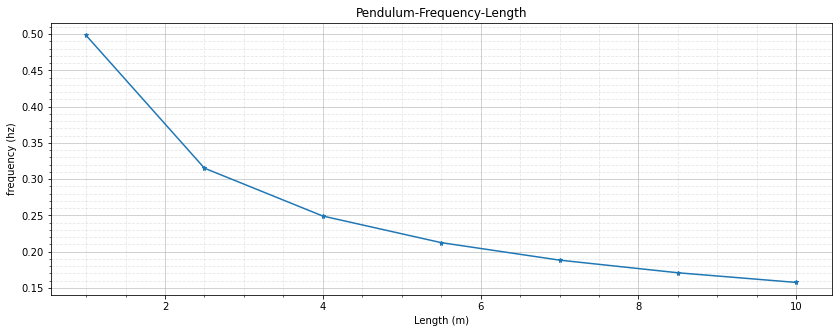

In [52]:
# equations:
# Pendulum ::: 2*pi*F = sqrt (g/L)
# Garden-gate pendulum ::: 2*pi*F = sqrt (g*sin(a)/L) ==> for horizontal channels

# length of the pendulum
Lss = np.linspace(1,10,7)

g = 9.8
px = g/Lss
pf = (np.sqrt(px))/(2*np.pi)


## plot
fig = plt.figure(figsize=(14,5))
ax1 = fig.add_subplot(111, label="1")

ax1.plot(Lss, pf, marker = '*', markersize=5 )

ax1.set_xlabel('Length (m)', color="k") 
ax1.set_ylabel('frequency (hz)', color="k")

ax1.set_title('Pendulum-Frequency-Length')
plt.gca().xaxis.set_minor_locator(mpl.ticker.AutoMinorLocator())
plt.gca().yaxis.set_minor_locator(mpl.ticker.AutoMinorLocator())
plt.grid(which='major', alpha=.7)
plt.grid(which='minor', linestyle='--', alpha=.3)
#print(Lss,px,pf)
plt.show()


## 4- Garden-gate pendulum

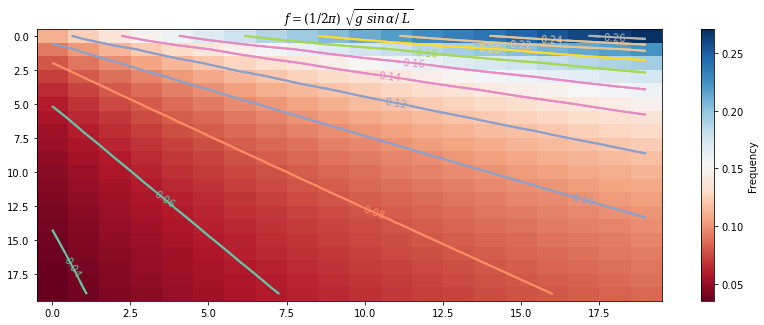

In [67]:
from numpy import exp,arange
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show
# equations:
# Garden-gate pendulum ::: 2*pi*F = sqrt (g*sin(a)/L) ==> for horizontal channels 

# length of the pendulum in meter
Length = np.linspace(1,10,20)
#Length = arange(0.1,5.0,0.2)
alpha = np.linspace(0.05,0.3,20)
#alpha = (0.05,0.1,0.15,0.2,0.25,0.3)
#alpha = arange(0.01,0.9,0.05)
sinalpha = np.sin(alpha) 

g = 9.8

def f_func(sinalpha,Length):
 return ((1/(2*np.pi))*(np.sqrt(g*sinalpha/Length)))

A,L = meshgrid(sinalpha, Length) # grid of point
F = f_func(A, L) # evaluation of the function on the grid

## uncomment to plot the 2D contour plot
fig = plt.figure(figsize=(14,5))
ax1 = fig.add_subplot(111, label="1")

im = ax1.imshow(F,cmap=cm.RdBu , aspect='auto') # drawing the function
## adding the Contour lines with labels
ax1.cset = contour(F,arange(0.04,0.3,0.02),linewidths=2,cmap=cm.Set2)
cset = contour(F,arange(0.04,0.3,0.02),linewidths=2,cmap=cm.Set2)

clabel(ax1.cset,inline=True,fmt='%1.2f',fontsize=10)
cbar=plt.colorbar(im) # adding the colobar on the right
cbar.set_label('Frequency')

##latex title
title('$f=(1/2\pi)\ \sqrt{g\ sin{\,\\alpha /\ L}}$')
ax1.set_xlabel(r"")
ax1.set_ylabel(r"")
show()


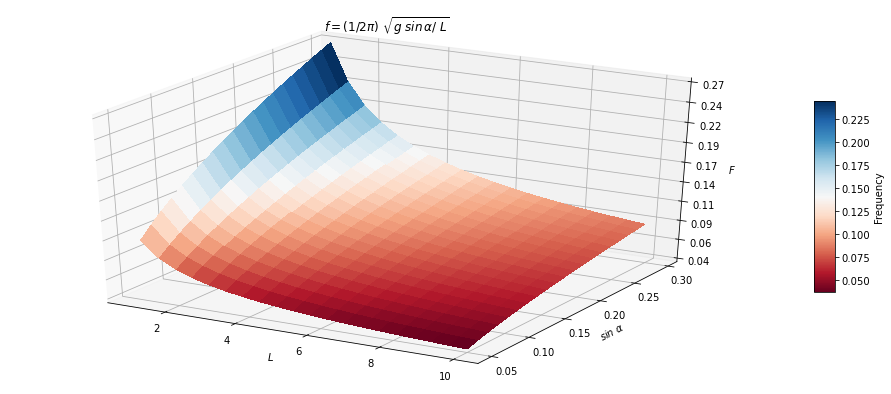

In [62]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt


# make and plot figure

fig = plt.figure(figsize=(17,7))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(L, A, F, rstride=1, cstride=1, 
                      cmap=cm.RdBu,linewidth=0, antialiased=False)

#cset = ax.contour(L, A, F, colors='k')  # Plot contour curves
#ax.clabel(cset, fontsize=9, inline=True)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

cbar=plt.colorbar(surf, shrink=0.5, aspect=9)
cbar.set_label('Frequency')

title('$f=(1/2\pi)\ \sqrt{g\ sin{\,\\alpha /\ L}}$')
ax.set_xlabel(r"$L$")
ax.set_ylabel(r"$sin\ \alpha$")
ax.set_zlabel(r"$F$")

plt.show()

## 5- Effect of damping on signal - ELECTROMAGNETIC velocity transducer


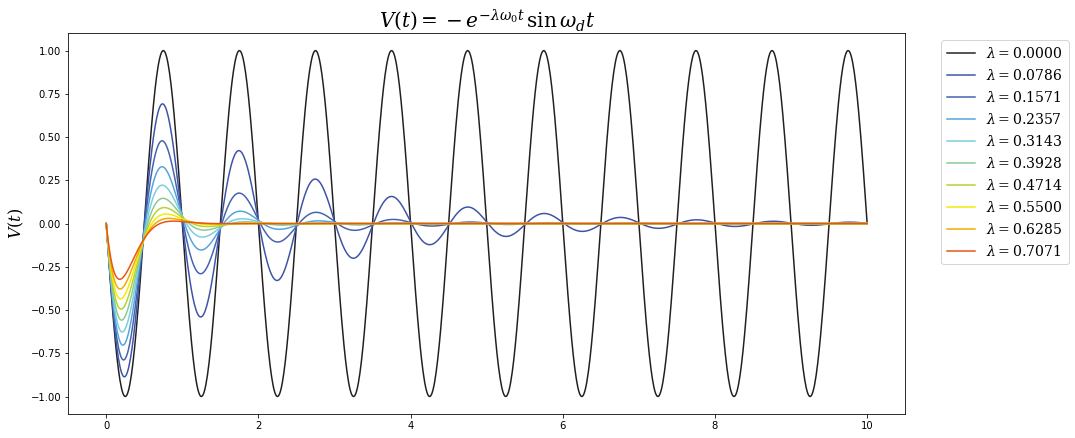

In [63]:
### inspired by Figure 2.10 Havskov and Young-Abbot 2020, SRL 
#
#
#
# import statements
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# number of lines we're going to plot
N = 10

# make a N damping coefficients from 0 to sqrt(2)/2 (critical damping)
damping_coefs = np.linspace(0, np.sqrt(2)/2, N)
# get a list of colors from a colormap
#colors = plt.cm.get_cmap('gist_rainbow_r')(np.linspace(0, 1, N))
colors = np.array([
    [232,  85,  18],
    [244, 169,   0],
    [243, 235,   6],
    [181, 211,  50],
    [138, 202, 148],
    [124, 205, 222],
    [ 85, 163, 220],
    [ 68,  98, 175],
    [ 61,  83, 166],
    [ 35,  31,  32]])/255
colors = colors[::-1]  # flip the array around

# make a figure
plt.figure(figsize=[15,7])

# plot a bunch of weight lifts
for h, c in zip(damping_coefs, colors):  # for each pair of coefs and colors

# set up a seismometer with a natural period of 1 s
    T0 = 1           # natural period (s)
    f0 = 1/T0        # natural frequency (Hz)
    w0 = 2*np.pi*f0  # natural angular frequency
    
    # compute damped parameters
    wd = w0*np.sqrt(1-h**2)  # damped angular frequency
    fd = wd / (2*np.pi)      # damped frequency
    Td = 1/fd                # damped period
    
    # make the actual weight lift
    t = np.linspace(0, 10, 1000)        # time axis (1 period length)
    V = lambda t: -np.exp(-h*w0*t)*np.sin(wd*t)  # weight lift
    
    # plot the weight lift and important points
    plt.plot(t,      V(t),      '-', color=c, fillstyle='none', markersize=8, clip_on=False)  # full waveform

    # label the figure
mpl.rcParams['mathtext.fontset'] = 'dejavuserif'  # serif font for latex
plt.title(r"$V(t) = -e^{-\lambda\omega_0 t}\,\sin{\,\omega_d t}$", fontsize=20)
plt.ylabel(r"$V(t)$", fontsize=16)
#plt.xticks([0, 1/4, 1/2, 3/4, 1],
#           [r"$0$", r"$^1/_4 T_0$", r"$^1/_2 T_0$", r"$^3/_4 T_0$", r"$T_0$"], fontsize=14)

# make a nice and orderly legend by plotting nans
for h, c in zip(damping_coefs, colors):
    plt.plot(np.nan, np.nan, '-', color=c, label=r"$\lambda = {:.4f}$".format(h))

plt.legend(bbox_to_anchor=(1.035,1), loc="upper left", fontsize=14)
# show the figure
plt.show()